Integrantes: 
- Juan David Cepeda Bogota
- Julian Mondragon
- Manuel Rodriguez

# Implementacion

## Grover

In [15]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator
from condor_oracle import build_Uf_condor, N_CONFIG_BITS

In [16]:
simulador = AerSimulator(method = 'statevector')

In [17]:
qr = QuantumRegister(N_CONFIG_BITS + 1)
cr = ClassicalRegister(N_CONFIG_BITS)
circuito = QuantumCircuit(qr, cr)

In [18]:
Uf_condor = build_Uf_condor()

In [19]:
circuito.h(range(N_CONFIG_BITS))

In [20]:
def phase_oracle_from_query(Uf_condor: QuantumCircuit) -> QuantumCircuit:
    """
    Given an (n+1)-qubit query oracle Uf implementing
        |x, y> -> |x, y ⊕ f(x)>,
    build a circuit that realises the phase oracle

        Z_f : |x> -> (-1)^{f(x)} |x>

    using the phase kickback trick with the (n-th) ancilla qubit.
    The ancilla is prepared in |-> and returned to |-> afterwards.
    """

    n_plus_1 = Uf_condor.num_qubits
    anc = n_plus_1 - 1

    qc = QuantumCircuit(n_plus_1, name="Z_f_from_Uf")

    # Prepare ancilla in |-> from |0>:  X |0> = |1>, then H|1> = |->.
    qc.x(anc)
    qc.h(anc)

    qc.compose(Uf_condor, inplace=True)

    # Unprepare ancilla: H then X (inverse of what we did)
    qc.h(anc)
    qc.x(anc)

    return qc


In [21]:
circuito.append(phase_oracle_from_query(Uf_condor).to_gate(), range(N_CONFIG_BITS + 1))

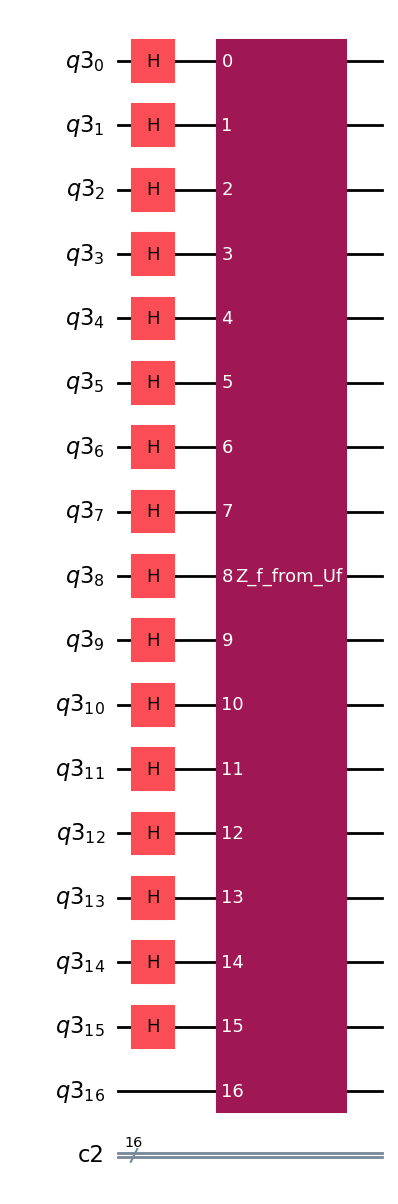

In [22]:
circuito.draw('mpl')

In [23]:
circuito.h(range(N_CONFIG_BITS))